# PISA Data 2012
## by Oleksandra Laurent



### About dataset

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education.
Around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally.

The data consists of features of about 500000 students. This data is based on PISA 2012 survey which consisted of a paper-based test taken by students, questionnaires taken by school principals to provide information about the students' backgrounds, schools and learning experiences and the broader school system and learning environment. All this information was gathered in the data set used in this analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Preliminary Wrangling

In [2]:
#load data
df=pd.read_csv('pisa2012.csv', encoding='latin-1', low_memory=False )

In [3]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.shape

(485490, 636)

In [5]:
# display all columns
pd.set_option('display.max_columns', 636)

In [6]:
df.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

For purposes of this analysis, I will need a single value representing student's scores in each of the subjects. To get it I will create 3 news columns for each subject and 1 column with an average score of all 3 subjects.

In [7]:
#create scores column
df['math_score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['reading_score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['science_score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5
#create column with average score from all subjects
df['ave_score']=(df['math_score']+df['science_score']+df['reading_score'])/3

For  analysis I won't use all the columns. Before assessing data further let's drop the columns which won't be used.

In [8]:
#drop columns   
df_clean = df[['CNT','ST04Q01', 'ST08Q01' , 'ST26Q02' ,'ST26Q07', 'ST29Q07', 'ST35Q04','ST26Q04','ST72Q01',
         'ST79Q03','ST79Q05','ST87Q03','ST93Q01','math_score','reading_score','science_score', 'ave_score' ]]

In [9]:
#rename all columns 
df_clean = df_clean.rename(columns={'CNT': 'country', 'ST04Q01': 'gender', 'ST08Q01': 'late_for_sch', 'ST26Q02':'possessions_room',
                                    'ST26Q07':'possessions_literature','ST26Q04':'possessions_computer', 'ST29Q07':'math_imprtnt_future_student',
                                    'ST35Q04':'math_imprtnt_future_parents',  'ST72Q01':'class_size', 'ST79Q03':'teach_diff_task_to_diff_stud', 
                                    'ST79Q05':'teach_gives_feedback','ST87Q03':'stud_belong_at_sch', 'ST93Q01':'stud_give_up_easy'})

In [10]:
df_clean

,country,gender,late_for_sch,possessions_room,possessions_literature,math_imprtnt_future_student,math_imprtnt_future_parents,possessions_computer,class_size,teach_diff_task_to_diff_stud,teach_gives_feedback,stud_belong_at_sch,stud_give_up_easy,math_score,reading_score,science_score,ave_score
0,Albania,Female,None,No,No,Agree,Agree,No,NaN,Never or Hardly Ever,Most Lessons,Strongly disagree,Very much like me,366.18634,261.01424,371.91348,333.038020
1,Albania,Female,One or two times,Yes,Yes,Disagree,Agree,Yes,30.0,NaN,NaN,NaN,Not at all like me,470.56396,384.68832,478.12382,444.458700
2,Albania,Female,None,Yes,Yes,Strongly agree,Strongly agree,Yes,30.0,NaN,NaN,NaN,Not much like me,505.53824,405.18154,486.60946,465.776413
3,Albania,Female,None,Yes,Yes,NaN,NaN,Yes,28.0,Every Lesson,Every Lesson,NaN,NaN,449.45476,477.46376,453.97240,460.296973
4,Albania,Female,One or two times,Yes,Yes,Strongly agree,Strongly agree,Yes,NaN,Most Lessons,Most Lessons,Strongly agree,NaN,385.50398,256.01010,367.15778,336.223953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,Female,One or two times,No,No,Agree,Strongly agree,Yes,41.0,NaN,NaN,NaN,Not much like me,486.22058,472.61846,536.31110,498.383380
485486,Vietnam,Male,One or two times,Yes,Yes,Agree,Agree,Yes,NaN,Never or Hardly Ever,Some Lessons,NaN,Somewhat like me,529.21794,487.24356,524.37522,513.612240
485487,Vietnam,Male,None,No,No,Agree,Agree,No,NaN,Some Lessons,Some Lessons,Agree,Not much like me,486.29850,476.25694,541.90600,501.487147
485488,Vietnam,Male,None,No,No,NaN,NaN,Yes,41.0,Never or Hardly Ever,Some Lessons,Disagree,NaN,522.90856,518.43922,526.70646,522.684747


While displaying data I have noticed some of the USA states in the country column. Let's have a closer look.

In [11]:
#check all unique values in country column
df_clean.country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

Some of the values in the country column are not grouped according to its countries: Macao-China, Hong Kong-China, China-Shanghai, Perm(Russian Federation), Florida (USA), Connecticut (USA), Massachusetts (USA). Macao and Hong Kong are special administrative region and those areas operate with a high degree of autonomy. So for this study, they will stay as separate items in country columns. There is no input from China, therefore China-Shanghai will stay as it is as well. But as there no particular reason for Perm to be separated from the Russian Federation and for Florida, Connecticut and Massachusetts from the United States of America. These particular cities/states will be dropped.

In [12]:
df_clean.replace('Perm(Russian Federation)', 'Russian Federation', inplace=True)
df_clean.replace('Florida (USA)', 'United States of America', inplace=True)
df_clean.replace('Massachusetts (USA)', 'United States of America', inplace=True)
df_clean.replace('Connecticut (USA)', 'United States of America', inplace=True)

In [13]:
#check if changes applied 
df_clean.country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Russian Federation', 'United States of America', 'Romania',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'Vietnam'], dtype=object)

In [14]:
#concise summary of the dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       485490 non-null  object 
 1   gender                        485490 non-null  object 
 2   late_for_sch                  479143 non-null  object 
 3   possessions_room              469693 non-null  object 
 4   possessions_literature        465860 non-null  object 
 5   math_imprtnt_future_student   315066 non-null  object 
 6   math_imprtnt_future_parents   315160 non-null  object 
 7   possessions_computer          473877 non-null  object 
 8   class_size                    294163 non-null  float64
 9   teach_diff_task_to_diff_stud  313955 non-null  object 
 10  teach_gives_feedback          313637 non-null  object 
 11  stud_belong_at_sch            310821 non-null  object 
 12  stud_give_up_easy             312856 non-nul

There are a lot of missing values in the data.

In [15]:
df_clean.describe()

,class_size,math_score,reading_score,science_score,ave_score
count,294163.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,26.017759,469.651234,472.006964,475.808094,472.488764
std,9.223134,100.786610,98.863310,97.998470,96.036271
min,0.000000,54.767080,6.445400,25.158540,77.114593
25%,20.000000,396.019620,405.044200,405.762800,403.992595
50%,25.000000,465.734520,475.477980,475.512860,472.046460
75%,30.000000,540.123060,542.831195,546.381920,541.455700
max,200.000000,903.107960,849.359740,857.832900,826.592027


I will fill missing values with mean.

In [16]:
df_clean.loc[np.isfinite(df_clean['class_size']) == False, 'class_size'] = df_clean['class_size'].mean()

Other missing values are categorical data. For this analysis I will leave these missing values as they are.

Also most of columns should have dtype category

In [17]:
# convert into ordered categorical types
ordinal_var_dict = {'late_for_sch': ['None  ', 'One or two times  ', 'Three or four times  ', 'Five or more times  '],
                    'math_imprtnt_future_student': ['Strongly agree', 'Agree',  'Disagree', 'Strongly disagree'],
                   'math_imprtnt_future_parents': ['Strongly agree', 'Agree',  'Disagree', 'Strongly disagree'],
                   'teach_diff_task_to_diff_stud': ['Never or Hardly Ever','Some Lessons','Most Lessons' , 'Every Lesson'],
                   'teach_gives_feedback':['Never or Hardly Ever','Some Lessons','Most Lessons' , 'Every Lesson'],
                   'stud_belong_at_sch' : ['Strongly agree', 'Agree',  'Disagree', 'Strongly disagree'],
                   'stud_give_up_easy' :['Very much like me','Mostly like me','Somewhat like me','Not much like me','Not at all like me' ]}

for var in ordinal_var_dict:
   ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordinal_var_dict[var])
   df_clean[var] = df_clean[var].astype(ordered_var)

In [18]:
#change to dtype category
df_clean[['country','gender','possessions_room','possessions_literature','possessions_computer']]=df_clean[['country',
                    'gender','possessions_room','possessions_literature','possessions_computer']].astype('category')

The class size should be an integer value.

In [19]:
df_clean[['class_size']]=df_clean[['class_size']].astype('int')

In [20]:
#check column type
df_clean.dtypes

country                         category
gender                          category
late_for_sch                    category
possessions_room                category
possessions_literature          category
math_imprtnt_future_student     category
math_imprtnt_future_parents     category
possessions_computer            category
class_size                         int32
teach_diff_task_to_diff_stud    category
teach_gives_feedback            category
stud_belong_at_sch              category
stud_give_up_easy               category
math_score                       float64
reading_score                    float64
science_score                    float64
ave_score                        float64
dtype: object

In [21]:
#check for duplicates in data
sum(df_clean.duplicated())

0

There are no duplicates in the data.

In [22]:
#saving cleaned file for slide deck
df_clean.to_csv('df_clean.csv', index= False, encoding='utf-8')

### What is the structure of your dataset?

There are 485490 students questioned with 17 selected features. Most of the variables are categorical. Some like scores and the size of the class are numeric features.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the data set are scores in math, science, reading and their average score and what those scores depend on.

For this analysis I will explore our features depending on:
- student personal trades like perseverance, coming to school on time, sense of belonging at school;
- family: which possessions student have at home, what is the parents' opinion of the importance of subjects;
- and schools: class size, teachers' support during lessons.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think features like country, student's belonging at school, perseverance will have the strongest effect on scores. Also, I expect that class size, teacher's feedback will influence scores. At last, it will be interesting to look if personal possessions will have any effects.

## Univariate Exploration


### Number of assessed students per country
To begin I'll look at the number of assessed students per country.

In [23]:
df_clean.country.value_counts()

Mexico           33806
Italy            31073
Spain            25313
Canada           21544
Brazil           19204
                 ...  
Tunisia           4407
Latvia            4306
New Zealand       4291
Iceland           3508
Liechtenstein      293
Name: country, Length: 64, dtype: int64

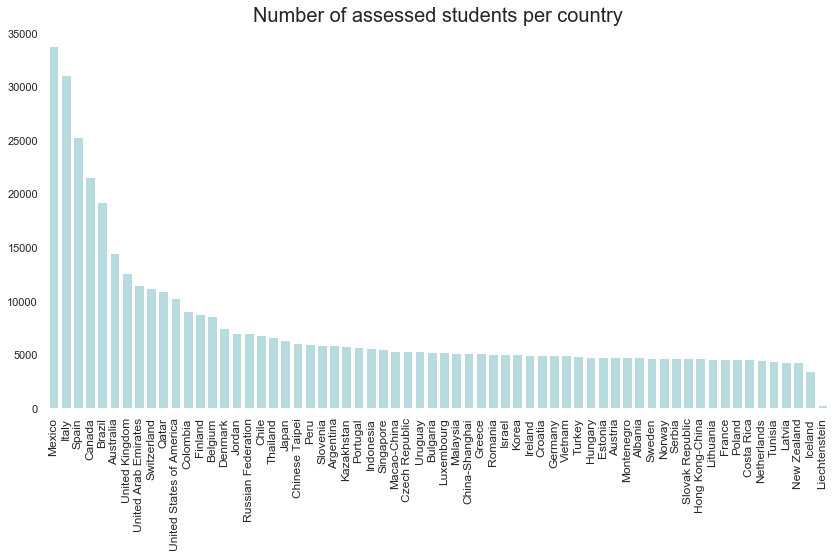

In [24]:
plt.figure(figsize=(14,7))
sns.set(style='white')
sns.countplot(data=df_clean, x = 'country',color='powderblue', order=df_clean['country'].value_counts().index);
sns.despine(bottom = True, left = True)
plt.xlabel(None )
plt.xticks( rotation=90, fontsize='12')
plt.ylabel(None)
plt.title('Number of assessed students per country', fontsize=20)
plt.show()

From the chart it's clear that the highest amount of student's replies in data comes from Mexico(33806), Italy(31073), Spain(25313) and Canada(21544). Brazil presented by a bit less than 20 000 entries. Australia, UK, UAE, Switzerland, Qatar and the USA between 10 000 - 15 000. Then we can see a big chunk of countries have around 5000 - 7000 assessed students. And at last little samples come from Liechtenstein(293).

Different amount of samples can be because of countries 15yo population and scale of PISA project in respective countries. Since we don't have the number of all 15 yo students in each country difference in numbers of students assessed won't be taken into account in this analysis.

### **Gender distribution in data set**

Let's see if there is an even amount of male and female students in the data.

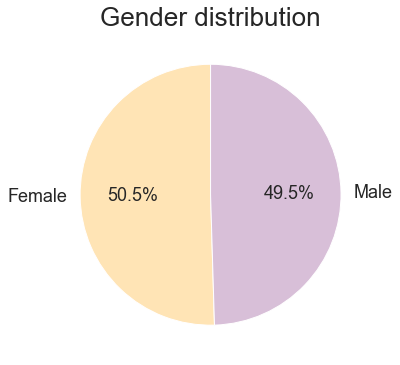

In [46]:
colors=['moccasin', 'thistle']
df_clean.gender.value_counts().plot(kind = 'pie', autopct='%.1f%%', figsize=(6,6), fontsize=18, startangle=90, colors=colors);
plt.title('Gender distribution', fontsize = 26) ;
plt.ylabel(None);

It's almost even which will ensure valid results in the analysis.

### Distribution of scores for each of the subjects
Now let's have a look at distribution of scores for each of the subjects through the whole dataset.

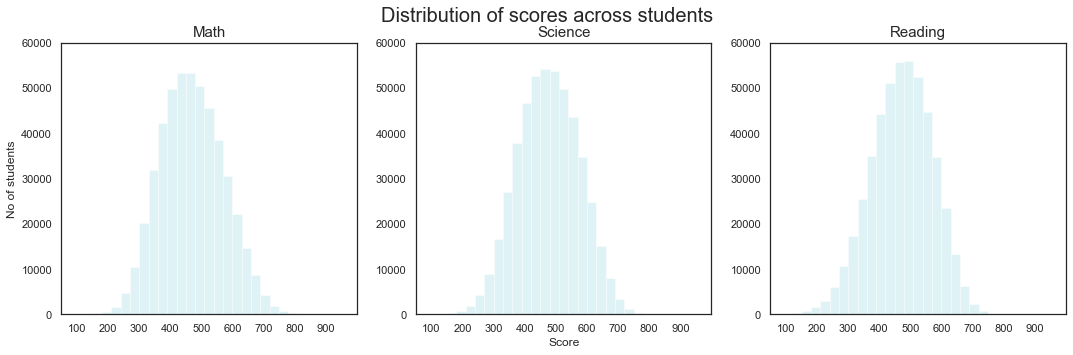

In [26]:
fig, ax = plt.subplots( figsize = [18,5])

#histogram of math score distribution
plt.subplot(1, 3, 1)
bin_edges = np.arange(0, df_clean['math_score'].max()+1, 30)
sns.distplot(df_clean['math_score'],  kde = False, bins = bin_edges, color='powderblue' );
# plot formatting
plt.title('Math', fontsize=15)
plt.xlabel(None)
plt.ylabel('No of students', fontsize=12)
plt.ylim(0, 60000)
plt.xlim(50, 1000)
plt.xticks([100,200,300,400,500,600,700,800,900])


#histogram of science score distribution
plt.subplot(1, 3, 2)
bin_edges = np.arange(0, df_clean['science_score'].max()+1, 30)
sns.distplot(df_clean['science_score'], kde = False, bins = bin_edges, color='powderblue');
# plot formatting
plt.title('Science', fontsize=15)
plt.xlabel('Score', fontsize=12)
plt.ylabel(None)
plt.ylim(0, 60000)
plt.xlim(50, 1000)
plt.xticks([100,200,300,400,500,600,700,800,900])

#histogram of reading score distribution
plt.subplot(1, 3, 3)
bin_edges = np.arange(0, df_clean['science_score'].max()+1, 30)
sns.distplot(df_clean['reading_score'], kde = False, bins = bin_edges, color='powderblue');
# plot formatting
plt.title('Reading', fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, 60000)
plt.xlim(50, 1000)
plt.xticks([100,200,300,400,500,600,700,800,900])

# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=20)
plt.show()

- The distributions of all scores appear to be uni-modal, with the distribution of math scores slightly right-skewed and reading score distribution slightly left-skewed.
- For all subjects most of the students received scores between 400-550 with slightly higher average scores for science.
- Small groups of students received low scores between 100-300 and high scores between 650-800 in all subjects.

Let's check with another plot

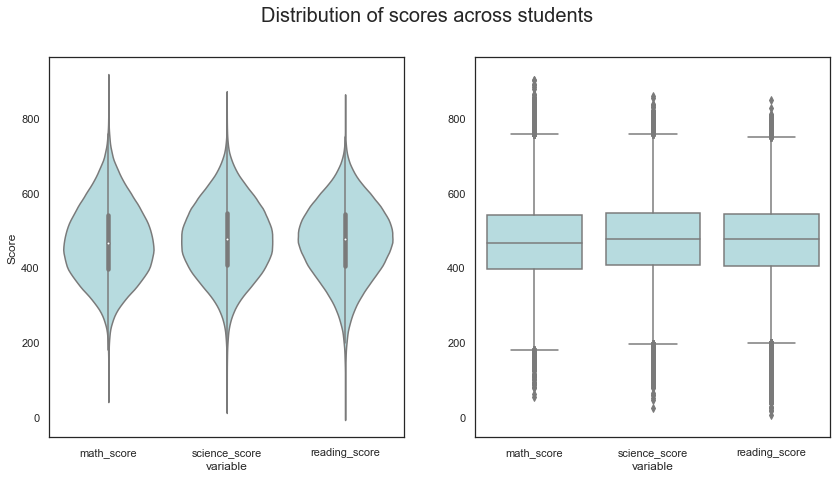

In [27]:
plt.figure(figsize = [14, 7])

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(x='variable', y='value', color='powderblue', data=pd.melt(df_clean[['math_score','science_score','reading_score']]));
plt.ylabel('Score', fontsize=12)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='variable', y='value',color='powderblue', data=pd.melt(df_clean[['math_score','science_score','reading_score']]));
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.ylabel(None)

# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=20)
plt.show()

All the boxes and violins look approximately the same which confirms observations from above. Also on these plots lower and upper adjacent values can be spotted better as well as outliers for all subjects.

### Top 10 performing countries for each subject

Now I will look at what countries have the best average performances in each subject.

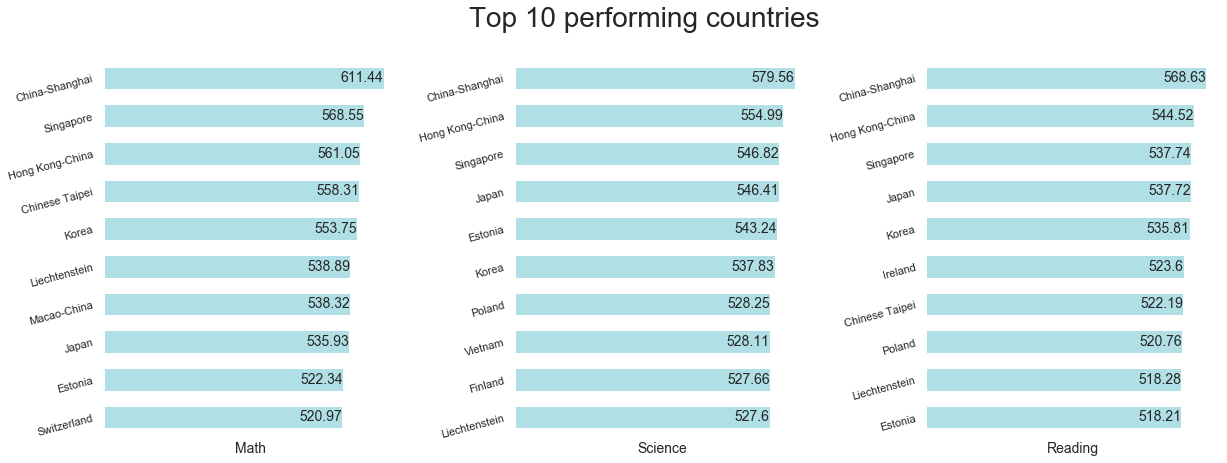

In [28]:
#create average score in each subject by country
top_math=df_clean.groupby('country')['math_score'].mean().nlargest(10)
top_science=df_clean.groupby('country')['science_score'].mean().nlargest(10)
top_reading=df_clean.groupby('country')['reading_score'].mean().nlargest(10)

fig, ax = plt.subplots(figsize = [20,7])
plt.subplots_adjust(wspace = 0.4)

#for math
plt.subplot(1, 3, 1)
top_math.plot( y='country', kind = 'barh', color='powderblue', width = 0.6)
plt.gca().invert_yaxis()
sns.despine(bottom = True, left = True)
plt.xlabel('Math', fontsize=14)
plt.ylabel(None)
plt.xticks(None)
plt.xticks([])
plt.yticks(fontsize=11, rotation=15)

for index, value in enumerate(top_math):
    plt.text( value, index, str(round(value, 2)), va = 'center', ha='right', fontsize=14)
    
#for science
plt.subplot(1, 3, 2)
top_science.plot( y='country', kind = 'barh', color='powderblue', width = 0.6)
plt.gca().invert_yaxis()
sns.despine(bottom = True, left = True)
plt.xlabel('Science', fontsize=14)
plt.ylabel(None)
plt.xticks([])
plt.yticks(fontsize=11, rotation=15)
for index, value in enumerate(top_science):
    plt.text( value, index, str(round(value, 2)), va = 'center', ha='right',fontsize=14)
    
#for reading 
plt.subplot(1, 3, 3)
top_reading.plot( y='country', kind = 'barh', color='powderblue', width = 0.6)
plt.gca().invert_yaxis()
sns.despine(bottom = True, left = True)
plt.xlabel('Reading', fontsize=14)
plt.ylabel(None)
plt.xticks([])
plt.yticks(fontsize=11, rotation=15)
for index, value in enumerate(top_reading):
    plt.text( value, index, str(round(value, 2)), va = 'center', ha='right',fontsize=14)
    
# set the overall title
plt.suptitle('Top 10 performing countries', fontsize=28)
plt.show()

- Through 3 subjects list of countries with the highest average score is very similar. In all 3 plots the highest average by Shanghai(China)followed by Singapore and Hong Kong (China)in math and vice versa for science and reading.
- Korea, Liechtenstein, Japan, Estonia are presented among Top 10 for all subjects.
- Chinese Taipei is in Top 10 for scores in math and reading.
- Poland is in Top 10 for scores in science and reading.
- Macao(China) and Switzerland have 1 entrance in math Top 10.
- Vietnam and Finland are in Top 10 performing countries for the score in science.
- Ireland is presented in Top 10 in the reading score.

From 3 plots above it is clear that countries located in East Asia have the highest average scores through all subjects.
Another region with high averages is Northern Europe with Estonia and Finland presented in plots.

## Bivariate Exploration

### Subjects score distributions by country
To start, I want to look at the performance of each country by subjects.

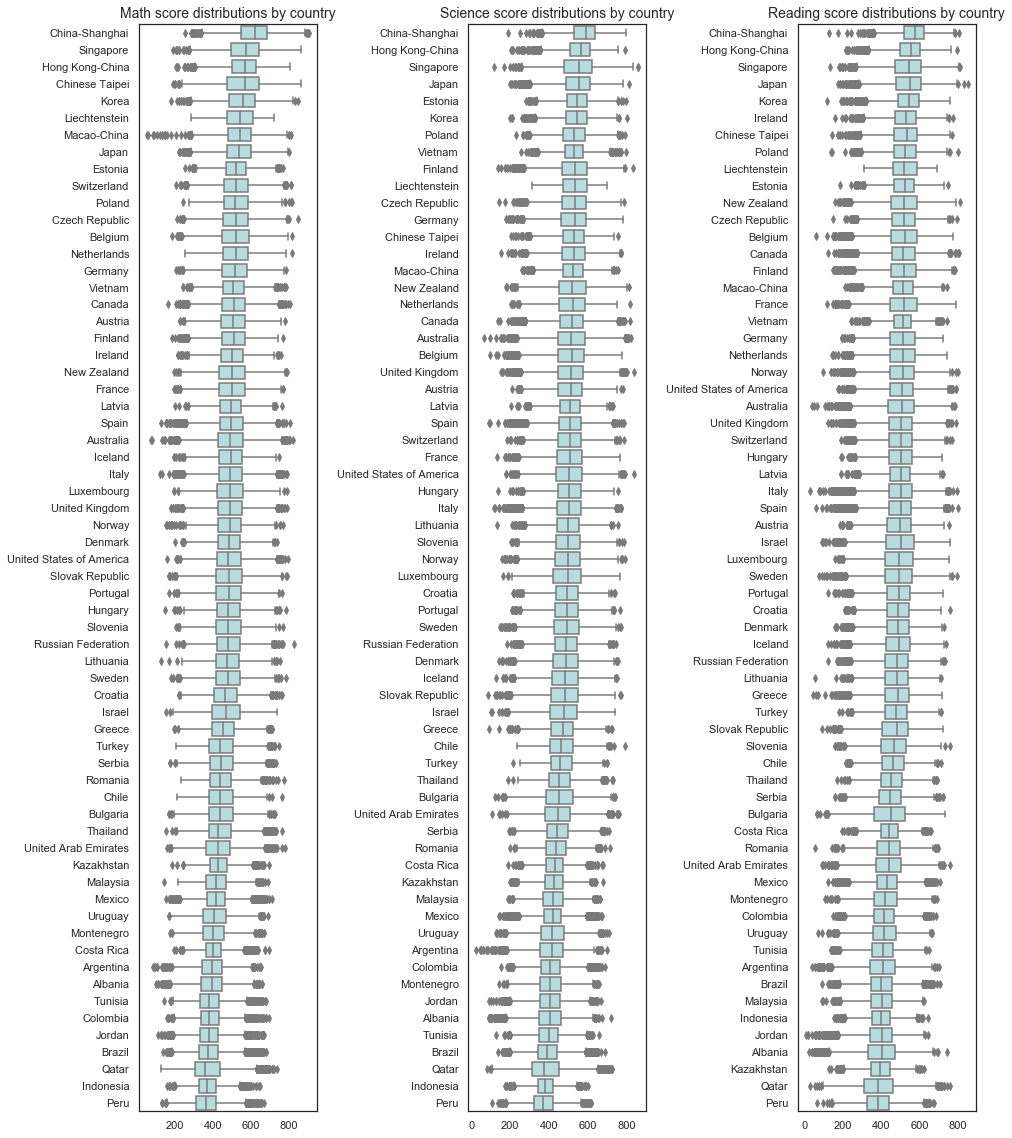

In [29]:
fig, ax = plt.subplots(figsize = [15,20])
plt.subplots_adjust(wspace = 0.85)

math_score = df_clean.groupby('country')['math_score'].mean().sort_values(ascending = False).index
reading_score = df_clean.groupby('country')['reading_score'].mean().sort_values(ascending = False).index
science_score = df_clean.groupby('country')['science_score'].mean().sort_values(ascending = False).index

#box plot for math score
plt.subplot(1, 3, 1)
sns.boxplot(data=df_clean, x='math_score', y='country',color='powderblue', order=math_score);
plt.title('Math score distributions by country', fontsize=14);
plt.xlabel(None)
plt.ylabel(None)
#box plot for science score
plt.subplot(1, 3, 2)
sns.boxplot(data=df_clean, x='science_score', y='country',color='powderblue', order=science_score);
plt.title('Science score distributions by country', fontsize=14);
plt.xlabel(None)
plt.ylabel(None)
#box plot for reading score
plt.subplot(1, 3, 3)
sns.boxplot(data=df_clean, x='reading_score', y='country',color='powderblue', order=reading_score);
plt.title('Reading score distributions by country', fontsize=14);
plt.xlabel(None)
plt.ylabel(None)
plt.show()


- Countries with higher averages in all subjects seem to come mostly from regions of East Asia, Oceania, West, North and Central Europe.
- The lowest averages come from Peru. It's on the bottom of the distribution plot for all of the subjects.
- Countries with the lowest averages in all subjects seem to come mostly from South America, the Middle East and Balkans.
- The situation with the outliers is different for each country. For example, we can see that even if Qatar has low averages on all subjects it has outliers with higher scores in science and reading than countries that are above it on average scores.


### Subjects score distributions by gender
Now let's check performances for each subject grouped by gender.

In [1]:
fig, ax = plt.subplots(figsize = [20,6])

#gender distribution for math score
plt.subplot(1, 3, 1)
sns.boxplot( y='math_score', x='gender', data=df_clean, palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Math score distribution between gender', fontsize='18')

#gender distribution for science score
plt.subplot(1, 3, 2)
sns.boxplot(y='science_score', x='gender', data=df_clean, palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Science score distribution between gender', fontsize='18')

#gender distribution for reading score
plt.subplot(1, 3, 3)
sns.boxplot(y='reading_score', x='gender', data=df_clean, palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Reading score distribution between gender', fontsize='18');

NameError: name 'plt' is not defined

- Distribution is similar for all subjects.
- For scores in math male students have a slightly higher average than the female with the similar lower adjacent values and slightly higher upper adjacent values and with outlier higher on a scale.
- For scores in science, averages are the same for both genders, though distribution for the male is more spreader with outliers higher on a scale.
- For scores in reading average score of female students is higher than for males with lower adjacent values higher on a scale.

### Late for school vs Ave score

Let's check if students who are late for school and who are on time have a different average score in all subjects combined.

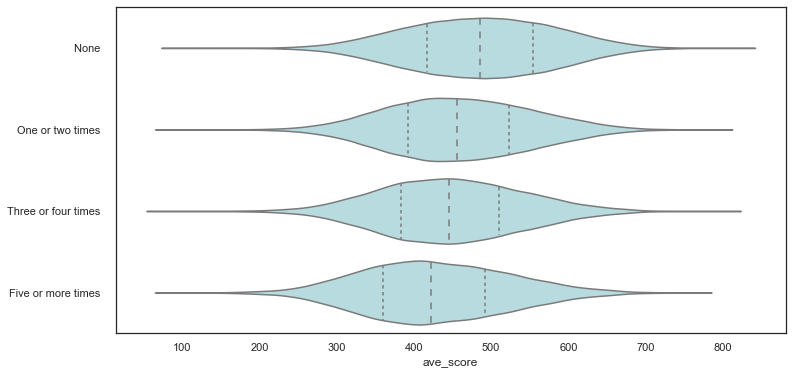

In [31]:
plt.figure(figsize=(12,6))
sns.violinplot(y='late_for_sch', x='ave_score', data = df_clean, color='powderblue', inner = 'quartile')
plt.ylabel(None);

It is visible from the plot that there is a difference in distributions and averages between students who are never late to school and who are late, especially more than 3 times. Being on time to school can be one of the factors which can influence students' performance. But also it can speak about the perseverance of the students: if a student is more serious about his studies he/she is less likely to be late to school.

### Student's personal trades vs Gender

Let's see if both genders feel a sense of belonging at school and if they give up easily.

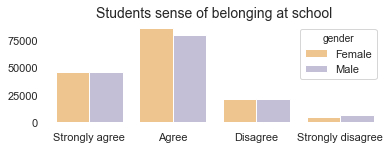

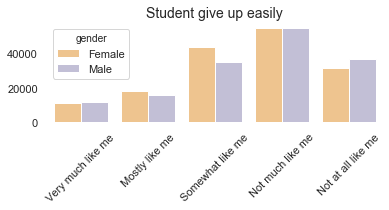

In [32]:
fig, ax = plt.subplots()
plt.subplots_adjust(wspace = 0.5)

#belonging by gender
plt.subplot(2, 1, 1)
sns.countplot(data=df_clean, x = 'stud_belong_at_sch', hue='gender', palette='PuOr')
sns.despine(bottom = True, left = True)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Students sense of belonging at school', fontsize=14)
plt.show()

#perceverance by gender
plt.subplot(2, 1, 2)
sns.countplot(data=df_clean, x = 'stud_give_up_easy', hue='gender', palette='PuOr')
sns.despine(bottom = True, left = True)
plt.xlabel(None)
plt.xticks( rotation=45, horizontalalignment='center')
plt.ylabel(None)
plt.title('Student give up easily', fontsize=14)
plt.show();

In general female and male students have the same sense of belonging to school with a number of females who agree that they belong to school slightly higher and slightly lower for strongly disagree.

A bit different situation is with perseverance. Again on general female and male students have the same perseverance. But female students are a bit more like to give up easily.

### Possessions vs Subjects score

Let's investigate if possession of concrete items affects the average score in each subject.

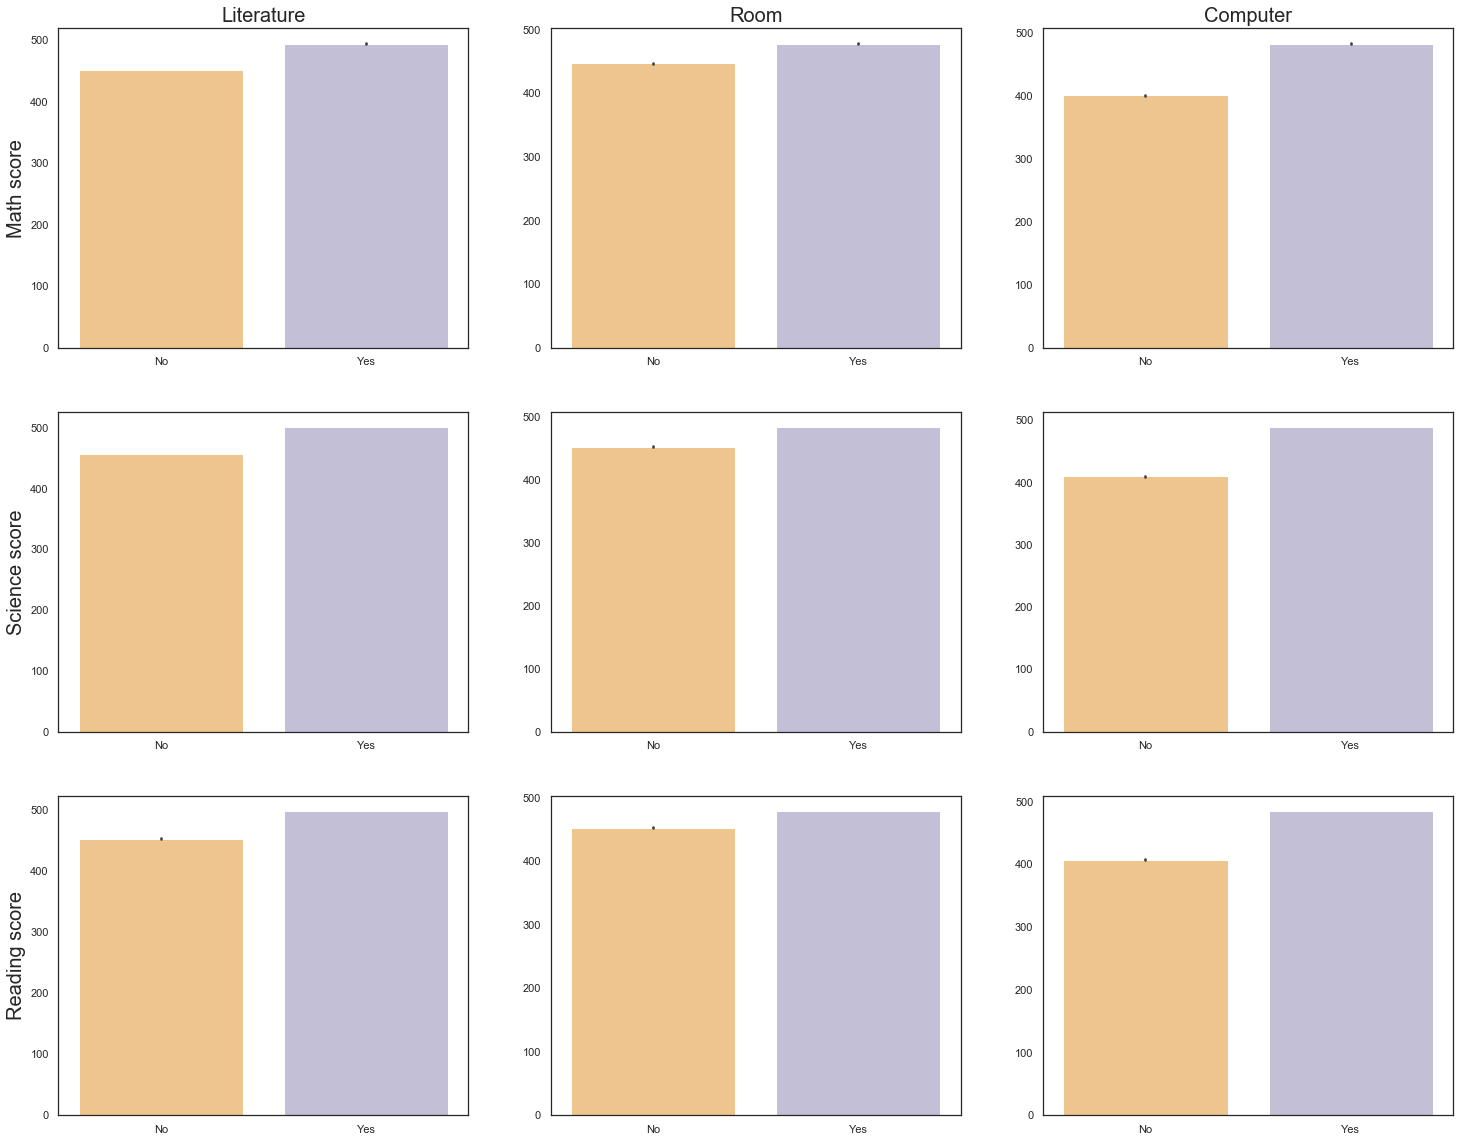

In [33]:
fig, ax = plt.subplots(figsize = [25,20])
plt.subplots_adjust(wspace = 0.2)


#for math literature
plt.subplot(3, 3, 1)
sns.barplot(data=df_clean, y='math_score', x='possessions_literature', palette = 'PuOr')
plt.title('Literature', fontsize=20);
plt.xlabel(None)
plt.ylabel('Math score', fontsize=20)

#for math room
plt.subplot(3, 3, 2)
sns.barplot(data=df_clean, y='math_score',x='possessions_room', palette = 'PuOr')
plt.title('Room', fontsize=20);
plt.xlabel(None)
plt.ylabel(None)

#for math computer
plt.subplot(3, 3, 3)
sns.barplot( data=df_clean, y='math_score',x='possessions_computer', palette = 'PuOr')
plt.title('Computer', fontsize=20);
plt.xlabel(None)
plt.ylabel(None)

#for science literature
plt.subplot(3, 3, 4)
sns.barplot(data=df_clean, y='science_score', x='possessions_literature', palette = 'PuOr')
plt.xlabel(None)
plt.ylabel('Science score', fontsize=20)

#for science room
plt.subplot(3, 3, 5)
sns.barplot(data=df_clean, y='science_score',x='possessions_room', palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)

#for science computer
plt.subplot(3, 3, 6)
sns.barplot( data=df_clean, y='science_score',x='possessions_computer', palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)

#for reading literature
plt.subplot(3, 3, 7)
sns.barplot(data=df_clean, y='reading_score', x='possessions_literature', palette = 'PuOr')
plt.xlabel(None)
plt.ylabel('Reading score', fontsize=20)

#for reading room
plt.subplot(3, 3, 8)
sns.barplot(data=df_clean, y='reading_score',x='possessions_room', palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)

#for reading computer
plt.subplot(3, 3, 9)
sns.barplot( data=df_clean, y='reading_score',x='possessions_computer', palette = 'PuOr')
plt.xlabel(None)
plt.ylabel(None)

plt.show()

Students with possessions of a private room, computer or books at home have a higher average score in all subjects. But the difference is not very significant especially for the possession of the private room.

### Student's interest in math vs Parent's interest in math

Let's see if a student who thinks that math is important for the future has parents who think like that.

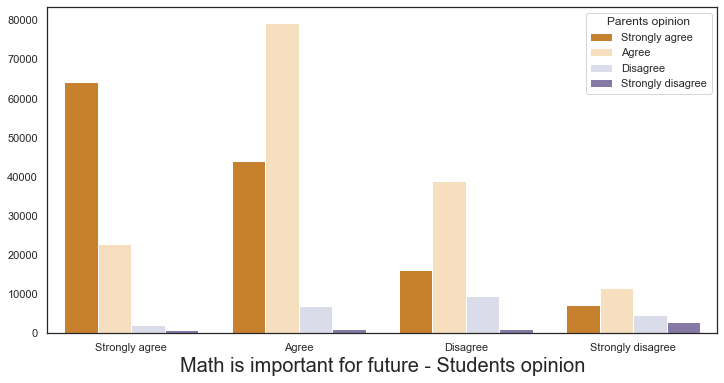

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_clean, x = 'math_imprtnt_future_student', hue = 'math_imprtnt_future_parents', palette = 'PuOr')
plt.legend(title='Parents opinion')
plt.ylabel(None);
plt.xlabel('Math is important for future - Students opinion', fontsize=20);

Most of the students agree that math is important for the future. Parents tend to agree on the importance of math. The amount of students who disagree or strongly disagree is bigger than the number of parents who think like that. And for students who disagree or strongly disagree parents still think that math is important for the future.

### Class size vs Ave score

Let's see if students in smaller or bigger classes received higher scores in different subjects.

In [35]:
#check descriptive statistics for the bins range
df_clean[['class_size', 'ave_score']].describe()

,class_size,ave_score
count,485490.000000,485490.000000
mean,26.010760,472.488764
std,7.179305,96.036271
min,0.000000,77.114593
25%,24.000000,403.992595
50%,26.000000,472.046460
75%,27.000000,541.455700
max,200.000000,826.592027


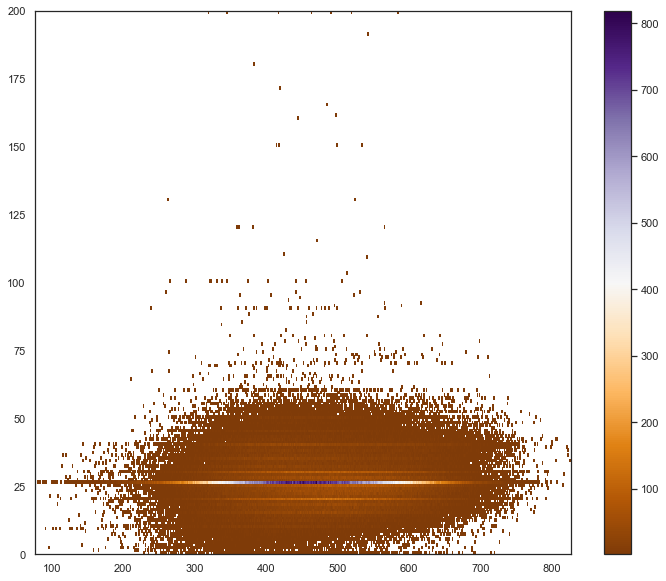

In [36]:
plt.figure(figsize = [12, 10])
bins_x = np.arange(77, 826+1, 1)
bins_y = np.arange(0, 200+1, 1)
plt.hist2d(data = df_clean, x = 'ave_score', y = 'class_size',
           bins = [bins_x, bins_y],cmap = 'PuOr', cmin = 0.5)
plt.colorbar();

From the heatmap above it appears that there is no correlation between class size and the average score of the students.

### Teachers' support vs Ave score

Let's see how different type of support related to students' average score.

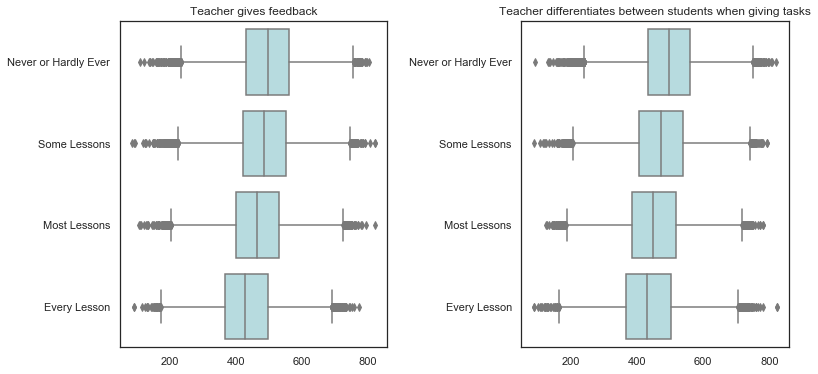

In [37]:
fig, ax = plt.subplots(figsize = [12,6])
plt.subplots_adjust(wspace = 0.5)

# feedback vs ave score
plt.subplot(1, 2, 1)
sns.boxplot(data = df_clean, x = 'ave_score', y = 'teach_gives_feedback', color='powderblue' )
plt.title('Teacher gives feedback')
plt.xlabel(None)
plt.ylabel(None);

#different tasks vs ave score
plt.subplot(1, 2, 2)
sns.boxplot(data = df_clean, x = 'ave_score', y = 'teach_diff_task_to_diff_stud', color='powderblue')
plt.title('Teacher differentiates between students when giving tasks')
plt.xlabel(None)
plt.ylabel(None);

According to the results of plots students who receive teachers' feedback and who are given different tasks than other students are performing worse than students who don't receive feedback or never given a different task.

## Multivariate Exploration


### Country vs Ave score vs Gender

At first let's look at average score distribution for each country depending on the gender of the student.

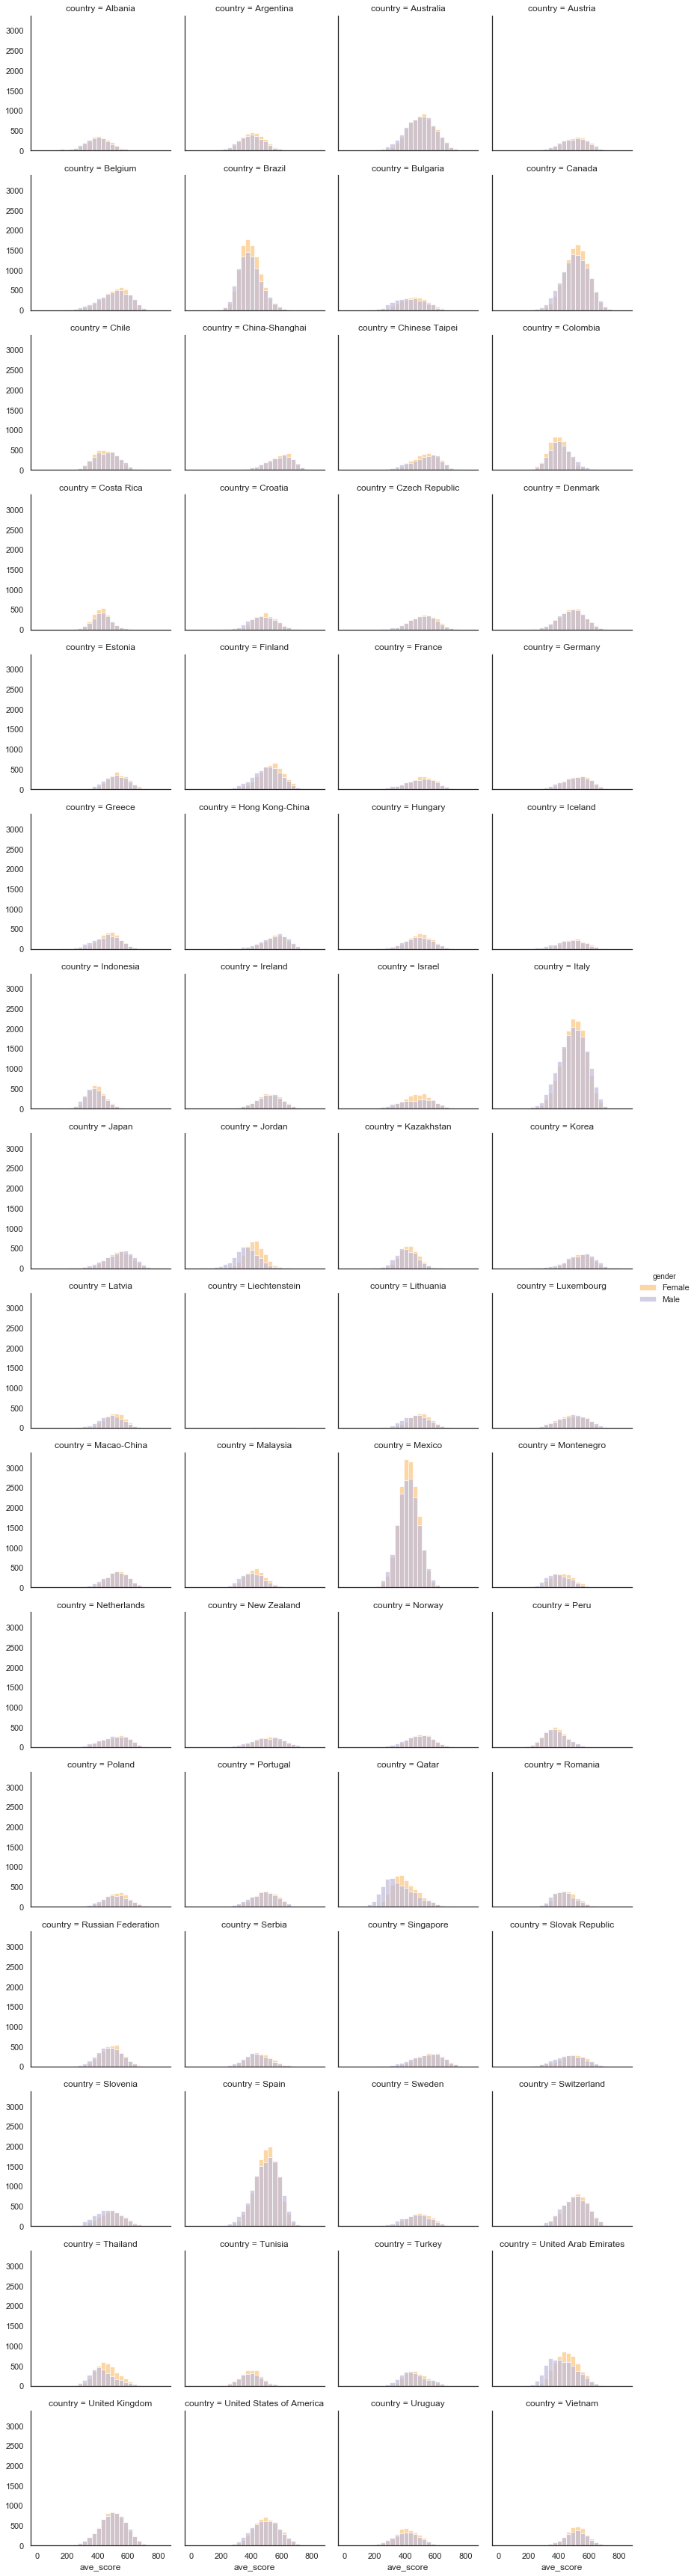

In [38]:
g = sns.FacetGrid(data = df_clean, col = 'country', hue='gender', palette='PuOr', col_wrap=4)
g.map(plt.hist, 'ave_score',  bins = bin_edges, alpha = 0.7 ).add_legend();

Most of the countries have even average score distribution between genders. There are some exceptions: UK, Vietnam, Mexico, Jordan, Hong Kong, Canada and Brazil have female students scores higher than male counterparts.

### Math score vs Science score vs Reading score vs Gender

Let's study the pair-by-pair relationship between Math Scores, Science Scores and Reading Scores and correlate them in pair scatter plots with gender as another variable to see if any correlation exists and what is its strength.

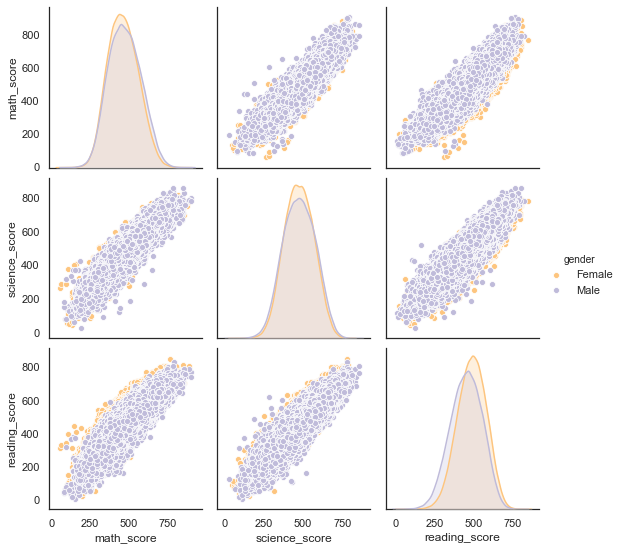

In [39]:
g = sns.pairplot(data=df_clean, vars = ['math_score', 'science_score', 'reading_score'], hue='gender', palette='PuOr')

There is strong and positive correlation between any pair of the three subjects for each gender.  

### Late for school vs Gender vs Ave score

Now let's check if gender feature will have an influence on the average score of students who are late or never late.

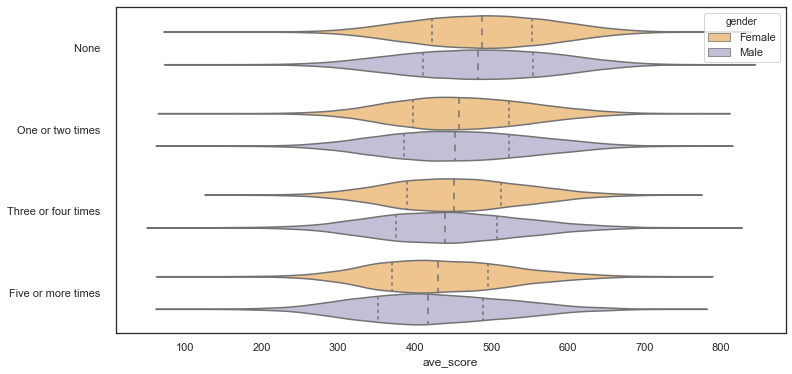

In [40]:
plt.figure(figsize=(12,6))
sns.violinplot(y='late_for_sch', x='ave_score', data = df_clean, palette='PuOr', inner = 'quartile', hue='gender')
plt.ylabel(None);

Distributions for different genders are very similar. There is almost no difference in average scores for male and female students who are never late to school or late one/two times with females having a slightly higher average. The bigger difference can be seen for students who are late 3 or more times.

### Student's personal trades vs Gender vs Ave score

Let's explore if gender plays a role in the score when a student's personal trades are taken into account.

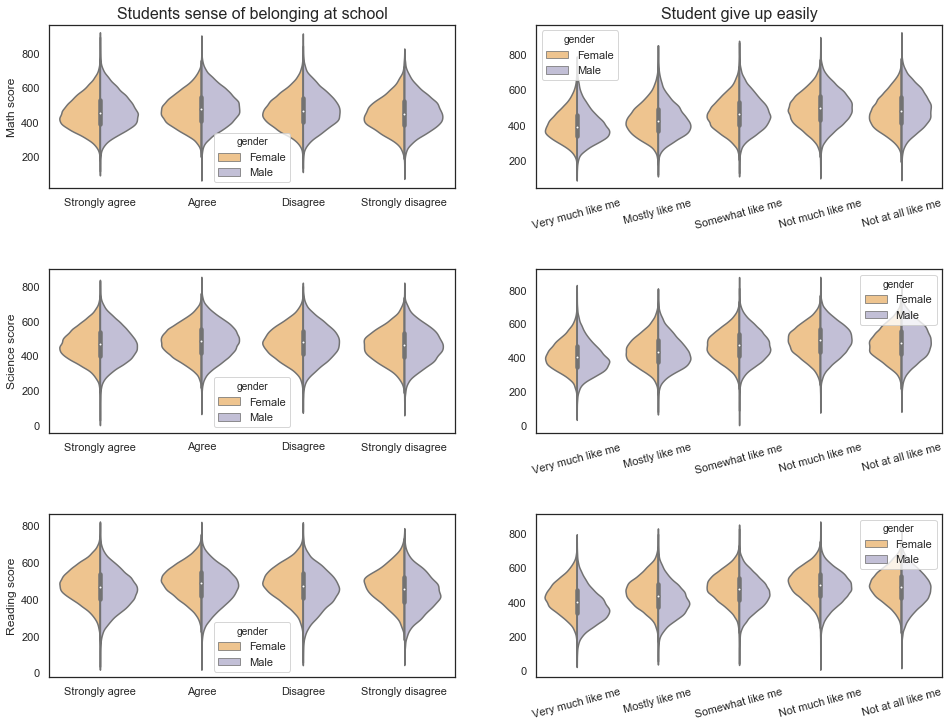

In [41]:
fig, ax = plt.subplots(figsize=(16,12))
plt.subplots_adjust(hspace = 0.5)

plt.subplot(3, 2, 1)
sns.violinplot( x = 'stud_belong_at_sch', y='math_score', hue='gender', palette='PuOr', data=df_clean, split=True);
plt.ylabel('Math score');
plt.xlabel(None);
plt.title('Students sense of belonging at school', fontsize=16);

plt.subplot(3, 2, 2)
sns.violinplot( x = 'stud_give_up_easy', y='math_score', hue='gender', palette='PuOr', data=df_clean, split=True);
plt.xlabel(None);
plt.ylabel(None);
plt.xticks( rotation=15, horizontalalignment='center')
plt.title('Student give up easily', fontsize=16);

plt.subplot(3, 2, 3)
sns.violinplot( x = 'stud_belong_at_sch', y='science_score', hue='gender', palette='PuOr', data=df_clean, split=True);
plt.ylabel('Science score');
plt.xlabel(None);

plt.subplot(3, 2, 4)
sns.violinplot( x = 'stud_give_up_easy', y='science_score', hue='gender', palette='PuOr', data=df_clean, split=True);
plt.xlabel(None);
plt.ylabel(None);
plt.xticks( rotation=15, horizontalalignment='center')

plt.subplot(3, 2, 5)
sns.violinplot( x = 'stud_belong_at_sch', y='reading_score', hue='gender', palette='PuOr', data=df_clean, split=True);
plt.xlabel(None);
plt.ylabel('Reading score');


plt.subplot(3, 2, 6)
sns.violinplot( x = 'stud_give_up_easy', y='reading_score', hue='gender', palette='PuOr', data=df_clean, split=True);
plt.xlabel(None);
plt.ylabel(None);
plt.xticks( rotation=15, horizontalalignment='center');


No matter of gender students who feel like they belong at school performs better through all the subjects. The same can be said about perseverance: both genders have higher scores if they tend not to give up easily.

### Conclusions

In this project, I've investigated scores in math, science and reading of about 500 000 students from more than 60 different countries. To help investigation I had considered features like personal possessions of students, personal trades, the gender of students, class size and others. I found out that:
- The distributions for all scores appeared to be uni-modal. Gender distribution for each subject was similar for all scores with slightly better scores in math and science for male students and in reading for females. There was a strong and positive correlation between any pair of the three subjects for each gender.
- Through 3 subjects the list of countries with the highest average score was very similar. In all 3 plots the highest average was by Shanghai(China)followed by Singapore and Hong Kong (China)in math and vice versa for science and reading. The lowest averages came from Peru. It was at the bottom of the distribution plot for all of the subjects. Countries with higher averages in all subjects came mostly from regions of East Asia, Oceania, West, North and Central Europe. Countries with the lowest averages in all subjects came mostly from South America, the Middle East and Balkans. Most of the countries had even average score distribution between genders. There were some exceptions: UK, Vietnam, Mexico, Jordan, Hong Kong, Canada and Brazil had female students average score higher than male counterparts.
- There was a difference in the distribution of average scores between students who are never late to school and who are late, especially more than 3 times. When gender was considered for this distribution results for both male and female students were almost the same: students who never or once/twice late have a higher average score.
- Female and male students had the same sense of belonging to school with a number of females who agree that they belong to school slightly higher and slightly lower for strongly disagree. No matter of gender students who felt like they belong at school performs better through all the subjects.
- Female and male students had almost the same perseverance responses. But female students were more like to give up easily. Also both genders had higher scores if they tend not to give up easily and vice versa.
- Students with possessions of a private room, computer or books at home had a higher average score in all subjects. But the difference was not very significant especially for the possession of the private room.
- Both students and their parents agreed on the importance of math for the future. Students disagreed about it more than parents did.
- There was no correlation found between class size and the average score of the students
- Students who received teachers' feedback and who were given different tasks than other students were found to perform worse than students who didn't receive feedback or were never given a different task.

### Resources used

- https://kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python
- https://seaborn.pydata.org/tutorial/categorical.html
- https://matplotlib.org/3.1.0/gallery/color/named_colors.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- https://www.quora.com/How-do-I-handle-missing-categorical-variable-in-an-easy-way
- https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
- https://github.com/plotly/plotly.github.io/issues/110~